import pandas as pd
import numpy as np

from project_functions import load
from project_functions import prune
from project_functions import wrangle

In [4]:
df = prune(wrangle(load("../../data/raw/meteorite-landings.csv")))
df

,Name,ID,Status,Class,Mass (g),Fall,Year,Latitude,Longitude,GeoLocation
0,Aachen,1.0,Valid,L5,21.0,Observed,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2.0,Valid,H6,720.0,Observed,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6.0,Valid,EH4,107000.0,Observed,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10.0,Valid,Acapulcoite,1914.0,Observed,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370.0,Valid,L6,780.0,Observed,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
31700,Zillah 002,31356.0,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
31701,Zinder,30409.0,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
31702,Zlin,30410.0,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
31703,Zubkovsky,31357.0,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [12]:

import matplotlib as mp
import altair as alt
import pandas_profiling as pp
import seaborn as sns


In [3]:
df.profile_report()

NameError: name 'df' is not defined

<AxesSubplot:>

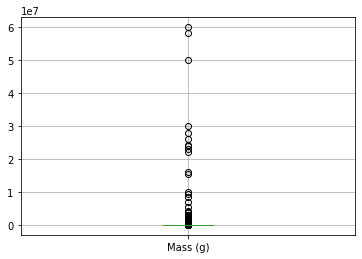

In [77]:
df.boxplot('Mass (g)')


### Primary Analysis ###
Observations
I noticed that a substantial amount of the GeoLocations show meteors being found or observed in Antartica, it may be necessary to remove these to a seperate dataframe for some more detailed analysis. For example cut out meteors under -60 degrees of latitude

Probably need to divide our Geolocations into categories, maybe by continent. This way we can better show the relationship between found or observed

The Boxplot above shows that the bulk of our meteors are much less then 1e7g (10,000 KG), may need to remove those above 10000KG to get a better understanding of meteor mass


In [95]:
df.describe()

,ID,Mass (g),Year,Latitude,Longitude
count,31705.000000,3.170500e+04,31705.000000,31705.000000,31705.000000
mean,20751.653272,1.867359e+04,1987.087084,-47.602009,73.452607
std,14974.205352,6.892699e+05,26.791228,46.714171,83.419083
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,9190.000000,6.530000e+00,1983.000000,-79.683330,26.000000
50%,18511.000000,3.007000e+01,1991.000000,-72.000000,57.147030
75%,27300.000000,2.050000e+02,2000.000000,18.393170,159.414820
max,57455.000000,6.000000e+07,2013.000000,81.166670,178.200000


In [96]:
df2 = df[df['Latitude'] > -60] #removes all values under -60 degrees latitude
df2.describe() #this shows that we have about 9600 values that are not in Antartica, out of 31,000

,ID,Mass (g),Year,Latitude,Longitude
count,9608.000000,9.608000e+03,9608.000000,9608.000000,9608.000000
mean,22291.755724,6.121558e+04,1979.422773,20.670831,11.678645
std,18070.910452,1.251092e+06,45.798570,21.089500,69.628650
min,1.000000,0.000000e+00,860.000000,-57.786670,-163.166670
25%,6909.750000,9.427500e+01,1976.000000,19.039715,-9.575253
50%,16783.500000,3.700000e+02,1999.000000,26.193335,16.361080
75%,34510.250000,2.125000e+03,2003.000000,31.992045,55.524078
max,57455.000000,6.000000e+07,2013.000000,81.166670,178.200000


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

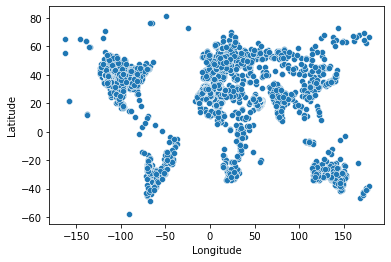

In [98]:
sns.scatterplot(data=df2, x='Longitude', y='Latitude') #without including Antartica, shows the distribution of meteors

In [6]:
dfFound = df[df['Fall'] == 'Found']
dfSeen = df[df['Fall']== 'Observed']

In [46]:
dfFound.head()

,Name,ID,Status,Class,Mass (g),Fall,Year,Latitude,Longitude,GeoLocation
1063,Abajo,4.0,Valid,H5,331.00,Found,1982.0,26.80000,-105.41667,"(26.800000, -105.416670)"
1064,Abar al' Uj 001,51399.0,Valid,H3.8,194.34,Found,2008.0,22.72192,48.95937,"(22.721920, 48.959370)"
1065,Abbott,5.0,Valid,H3-6,21100.00,Found,1951.0,36.30000,-104.28333,"(36.300000, -104.283330)"
1066,Abernathy,7.0,Valid,L6,2914.00,Found,1941.0,33.85000,-101.80000,"(33.850000, -101.800000)"
1067,Abo,8.0,Valid,H,1.20,Found,1840.0,60.43333,22.30000,"(60.433330, 22.300000)"


In [10]:
dfFound.describe()

,ID,Mass (g),Year,Latitude,Longitude
count,30642.000000,3.064200e+04,30642.000000,30642.000000,30642.000000
mean,20899.679884,1.767045e+04,1989.626885,-50.300061,75.296171
std,15083.468192,6.881301e+05,18.880188,44.971897,83.256050
min,4.000000,0.000000e+00,1575.000000,-87.366670,-165.433330
25%,9174.250000,6.200000e+00,1984.000000,-79.683330,35.666670
50%,18678.500000,2.718500e+01,1992.000000,-72.774722,57.311555
75%,27949.750000,1.679925e+02,2000.000000,-24.850000,159.666670
max,57455.000000,6.000000e+07,2012.000000,81.166670,178.200000


In [11]:
dfSeen.describe() #This shows just over 1000 out of 31,000 meteors were observed falling, next we will plot their locations on a scatter plot

,ID,Mass (g),Year,Latitude,Longitude
count,1063.000000,1.063000e+03,1063.000000,1063.000000,1063.000000
mean,16484.643462,4.758984e+04,1913.874882,30.171940,20.310107
std,10527.360498,7.210902e+05,74.778218,22.992631,69.458340
min,1.000000,1.000000e-01,860.000000,-44.116670,-157.866670
25%,10079.500000,7.000000e+02,1875.500000,22.016665,-4.525000
50%,15422.000000,2.900000e+03,1924.000000,36.100000,20.233330
75%,23109.000000,1.050000e+04,1964.000000,46.058335,76.465835
max,57168.000000,2.300000e+07,2013.000000,66.348330,174.400000


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

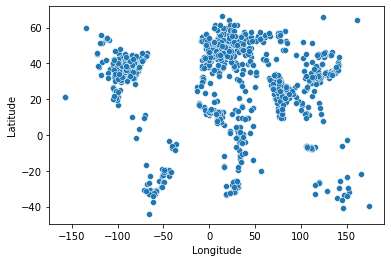

In [13]:
sns.scatterplot(data=dfSeen, x='Longitude', y='Latitude') #distribution for meteors seen falling

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

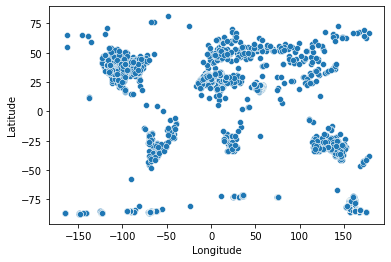

In [14]:
sns.scatterplot(data=dfFound, x='Longitude', y='Latitude') #distribution for meteors found